In [112]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from keras_tqdm import TQDMNotebookCallback
import copy
from keras import regularizers

In [226]:
filename = '../c_spaCy_Encoded.txt'

data = []
unique = {}
index = 0
y_train = [] # one hots are in here
sizes = []
author_reviews_count = 0
authors = 35
#same_author = True
# officeData has 4905 unique authors
#with open('officeDataEncoded.txt') as file:
with open(filename) as file:
    for line in file:
        author = line.split('\t')[0].rstrip('\n')
        r = line.split('\t')[1].rstrip('\n')[1:-1].split(',')

        vector = [float(x.strip(',')) for x in r if x != '']
        sizes.append(len(vector))
        
        if author not in unique:
            if len(unique) == authors:
                break
            unique[author] = np.zeros(authors)
            unique[author][index] = 1
            index += 1
            #same_author = False
        if len(vector) == 300:
            data.append(vector)
            y_train.append(unique[author])
            


#data = data

## Seperate Training/Test Sets

In [227]:
x_tr = []
y_tr = []
x_te = []
y_te = []

cur = y_train[0]
count = 0
for i in range(len(data)):
    if (y_train[i] == cur).all():
        # training set
        if count < 4:
            x_tr.append(data[i])
            y_tr.append(y_train[i])
        # test set
        else:
            x_te.append(data[i])
            y_te.append(y_train[i])

    else:
        cur = y_train[i]
        count = 0
        # training set
        if count < 4:
            x_tr.append(data[i])
            y_tr.append(y_train[i])
        # test set
        else:
            x_te.append(data[i])
            y_te.append(y_train[i])
    count += 1
        

In [228]:
x1 = copy.deepcopy(x_tr)
y1 = copy.deepcopy(y_tr)
for x in range(2):
    for i in x1:
        x_tr.append(i)
    for i in y1:
        y_tr.append(i)
print(len(x_tr))
print(len(y_tr))
print(len(x_te))
print(len(y_te))

420
420
239
239


"\nfor i in y_tr:\n    print(i)\nprint('*'*12)\nfor i in y_te:\n    print(i)\n"

## Shuffle and Reshape

In [229]:
from sklearn.utils import shuffle
x_training,y_training = shuffle(x_tr,y_tr, random_state=0)
# =====================================================
# =====================================================
x_training = np.array(x_tr)
print(x_training.shape)
# convert the 2d to 3d representation
x_training = x_training.reshape(x_training.shape + (1,))
print(x_training.shape)
output_shape = x_training.shape[1]
input_shape = x_training.shape[2]
y_training = np.array(y_tr)
print('X_training shape: ' + str(x_training.shape))
# =====================================================
# =====================================================

(420, 300)
(420, 300, 1)
X_training shape: (420, 300, 1)


## Network 1

In [230]:
model = keras.Sequential()

model.add(keras.layers.Conv1D(300, kernel_size=(3),strides=(1),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01),
                 activity_regularizer=regularizers.l1(0.01),
                 input_shape=[output_shape,
                              input_shape]))
model.add(keras.layers.MaxPooling1D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(y_training.shape[1], activation='softmax'))
#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=keras.losses.categorical_crossentropy,
    #optimizer = sgd,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 298, 300)          1200      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 149, 300)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 44700)             0         
_________________________________________________________________
dense_53 (Dense)             (None, 300)               13410300  
_________________________________________________________________
dense_54 (Dense)             (None, 35)                10535     
Total params: 13,422,035
Trainable params: 13,422,035
Non-trainable params: 0
_________________________________________________________________


## Network 2

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv1D(300, kernel_size=(3),strides=(1),
                 activation='relu',
                 input_shape=[output_shape,
                              input_shape]))
model.add(keras.layers.MaxPooling1D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(y_training.shape[1], activation='softmax'))
#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=keras.losses.categorical_crossentropy,
    #optimizer = sgd,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

model.summary()

## Network 3

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Dense(300,
                             activation='relu',
                             input_shape=[output_shape,input_shape]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(y_training.shape[1], activation='softmax'))
#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=keras.losses.categorical_crossentropy,
    #optimizer = sgd,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

model.summary()

## Training

In [231]:
batch_size = 5
epochs = 5
history = model.fit(x_training, y_training,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    shuffle=True,
    callbacks=[TQDMNotebookCallback()],
    validation_split = 0.2)

#x_te = np.array(x_te)

#score = model.evaluate(x_te, np.array([y_te]), verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

HBox(children=(IntProgress(value=0, description='Training', max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=336), HTML(value='')))

## Reshape Testing Data

In [232]:
print(x_training.shape)
print(y_training.shape)
x_te = np.array(x_te)
x_te = x_te.reshape(x_te.shape + (1,))
print(x_te.shape)
y_te = np.array(y_te)
print(y_te.shape)

(420, 300, 1)
(420, 35)
(239, 300, 1)
(239, 35)


## Testing

In [289]:
score = model.evaluate(x_te, y_te, verbose=1)
preds = model.predict_on_batch(x_training)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

39/39 [==============================] - 1s 30ms/step
Test loss: 3.3630230182256455
Test accuracy: 0.10256410256410256


239/239 [==============================] - 2s 8ms/step
Test loss: 12.255488411651994
Test accuracy: 0.016736401673640166


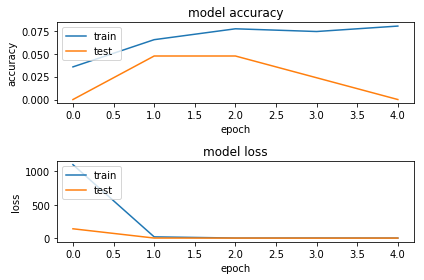

In [233]:
score = model.evaluate(x_te, y_te, verbose=1)
preds = model.predict_on_batch(x_te)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

## Predictions

In [121]:
'''
for y in range(0,len(preds)):
    m = max(preds[y][0:500])
    index = 0
    for i in range(0,500): #preds[0][0:500]:
        if preds[0][i] == m:
            index = i
    print(index)
'''

def get_auth(l):
    #l = list(l)
    for i in unique:
        if (unique[i] == l).all():
            return i

#m = max(preds[120])
print(len(preds[0]))
index = 0
incorrect = 0
correct = 0
for i in range(len(preds)): #preds[0][0:500]:
    m = max(preds[i])
    index = list(preds[i]).index(m)
    l = np.zeros(authors)
    l[index] = 1
    #print(get_auth(l))
    print(preds[i],index,y_te[i],'Guessed:',get_auth(l),'Actual:',get_auth(y_te[i]),end=' ')
    #for auth in unique:
    #if unique[auth][index] == 1:
    #    print('True')
    #else:
    #    print('False')
        #print(auth)
    if y_te[i][index] == 1:
        print('Correct')
        correct += 1
    else:
        print('Incorrect')
        incorrect += 1

print('Correct:',correct,'Incorrect:',incorrect,'Out of:',(correct+incorrect))
    


3
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[1. 0. 0.] 0 [0. 1. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A2F1ZOWOPNJB Incorrect
[1. 0. 0.] 0 [0. 1. 0.] Guessed: A1A1BM6N28X9J0 